Output()

122.46831202507019
state_in.shape (8,)
self._inout_pairs[0].shape[1] 8


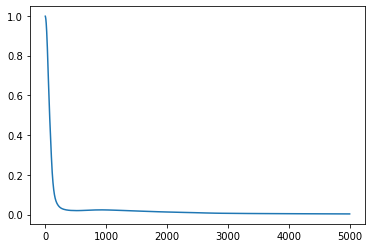

In [14]:
import numpy as np
import tensorflow as tf
from poenta.circuit import Circuit
import time

state_in = np.zeros(8, dtype=np.complex128)
state_in[0] = 1
target_out = np.zeros(8, dtype=np.complex128)
target_out[1] = 1

def loss(target, output):
    return  1 - tf.abs(tf.reduce_sum(output * tf.math.conj(target)))**2

device = Circuit(num_layers=8, num_modes=1, num_seed = 665, dtype=tf.complex128)
tuple_in_out = (state_in,target_out),
device.set_input_output_pairs(*tuple_in_out)
start = time.time()
device.optimize(loss, steps=5000)
end = time.time()
print(end - start)
final_state = device.show_final_state(state_in)

state_in.shape (8,)
self._inout_pairs[0].shape[1] 8


<BarContainer object of 8 artists>

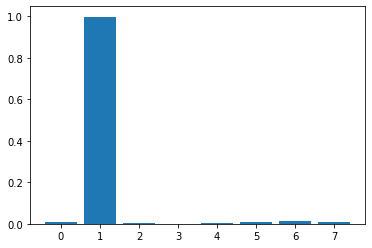

In [15]:
import matplotlib.pyplot as plt
x = np.arange(8)
final_state = device.show_final_state(state_in)
plt.bar(x,tf.abs(final_state))

Output()

683.4707360267639


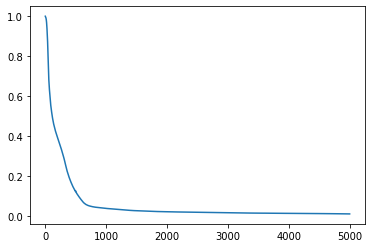

In [18]:
import numpy as np
import tensorflow as tf
from poenta.circuit import Circuit

state_in = np.zeros((10,10), dtype=np.complex128)
state_in[0,0] = 1
target_out = np.zeros((10,10), dtype=np.complex128)
target_out[5,0] = 1/np.sqrt(2)
target_out[0,5] = 1/np.sqrt(2)

def loss(target, output):
    return 1 - tf.abs(tf.reduce_sum(output * tf.math.conj(target))) ** 2

device = Circuit(num_layers=20, num_modes=2, num_seed = 665, dtype=tf.complex128)
tuple_in_out = (state_in,target_out),
device.set_input_output_pairs(*tuple_in_out)
start = time.time()
device.optimize(loss, steps=5000)
end = time.time()
print(end - start)

In [9]:
device.show_final_state(state_in)

state_in.shape (10, 10)
self._inout_pairs[0].shape[1] 10


array([[ 3.18890792e-03-1.60945804e-03j, -4.28605290e-03-1.29496417e-03j,
         9.42494335e-03+4.60192895e-03j, -8.61207570e-04-7.77334907e-03j,
         2.72321863e-03+3.74701137e-03j, -6.41811904e-01-3.00317897e-01j,
         2.76380681e-03+5.70640028e-04j, -5.55553075e-03-1.87567542e-03j,
        -2.75416910e-03+5.22469535e-03j, -1.09340281e-02+1.37447320e-02j],
       [ 1.04005336e-03-1.92731728e-03j, -1.63042794e-03+1.19329681e-03j,
         4.32539836e-03+4.84200189e-04j, -8.85210063e-03-1.32990430e-02j,
         9.46855869e-04+1.09645830e-03j,  4.47907092e-03+1.82027476e-03j,
         3.07447907e-03-1.28546967e-03j,  6.39455776e-03+3.11154256e-03j,
        -2.31451773e-03-4.34465843e-03j, -9.91891597e-04+1.26420978e-03j],
       [ 1.68882915e-04+2.03903176e-03j,  4.33110910e-03-1.55865096e-03j,
        -3.05996061e-03-1.75403184e-03j,  2.67893339e-03+6.11152586e-03j,
        -4.96024731e-03+3.72022081e-03j,  3.08164089e-03-1.87118695e-03j,
         3.20495725e-03-1.36397253e-

In [12]:
from scipy.special import factorial as fac
def hex_GKP(mu, d, delta, cutoff, nmax=7):
    r"""Hexagonal GKP code state.
    The Hex GKP state is defined by
    .. math::
        |mu> = \sum_{n_1,n_2=-\infty}^\infty e^{-i(q+\sqrt{3}p)/2}
            \sqrt{4\pi/\sqrt{3}d}(dn_1+\mu) e^{iq\sqrt{4\pi/\sqrt{3}d}n_2}|0>
    where d is the dimension of a code space, \mu=0,1,...,d-1, |0> is the
    vacuum state, and the states are modulated by a Gaussian envelope in the
    case of finite energy:
    ..math:: e^{-\Delta ^2 n}|\mu>
    Args:
        d (int): the dimension of the code space.
        mu (int): mu=0,1,...,d-1.
        delta (float): width of the modulating Gaussian envelope.
        cutoff (int): the Fock basis truncation of the returned state vector.
        nmax (int): the Hex GKP state |mu> is calculated by performing the
            sum using n1,n1=-nmax,...,nmax.
    Returns:
        array: a size [cutoff] complex array state vector.
    """
    n1 = np.arange(-nmax, nmax+1)[:, None]
    n2 = np.arange(-nmax, nmax+1)[None, :]

    n1sq = n1**2
    n2sq = n2**2

    sqrt3 = np.sqrt(3)

    arg1 = -1j*np.pi*n2*(d*n1+mu)/d
    arg2 = -np.pi*(d**2*n1sq+n2sq-d*n1*(n2-2*mu)-n2*mu+mu**2)/(sqrt3*d)
    arg2 *= 1-np.exp(-2*delta**2)

    amplitude = (np.exp(arg1)*np.exp(arg2)).flatten()[:, None]

    alpha = np.sqrt(np.pi/(2*sqrt3*d)) * (sqrt3*(d*n1+mu) - 1j*(d*n1-2*n2+mu))
    alpha *= np.exp(-delta**2)

    alpha = alpha.flatten()[:, None]
    n = np.arange(cutoff)[None, :]
    coherent = np.exp(-0.5*np.abs(alpha)**2)*alpha**n/np.sqrt(fac(n))

    hex_state = np.sum(amplitude*coherent, axis=0)
    return hex_state/np.linalg.norm(hex_state)

Output()

408.5121111869812


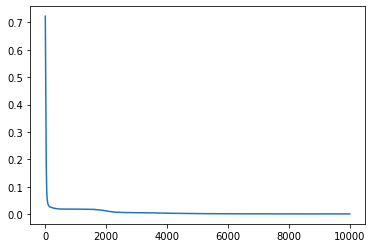

In [19]:
import numpy as np
import tensorflow as tf
from poenta.circuit import Circuit

state_in = np.zeros(50, dtype=np.complex128)
state_in[0] = 1
target_out = hex_GKP(1, 10, 0.3, 50, nmax=7)


def loss(target, output):
    return 1 - tf.abs(tf.reduce_sum(output * tf.math.conj(target))) ** 2

device = Circuit(num_layers=25, num_modes=1, num_seed = 665, dtype=tf.complex128)
tuple_in_out = (state_in,target_out),
device.set_input_output_pairs(*tuple_in_out)
start = time.time()
device.optimize(loss, steps=10000)
end = time.time()
print(end - start)